# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import datetime


data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


видим что нужно будет формат даты подправить и есть пропуски

In [5]:
data.shape

(23699, 22)

In [6]:
data.duplicated().sum()

0

хоть дубликатов нет

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

1.есть пропуски 
2.надо подправит название cityCenters_nearest
3.first_day_exposition перевести в формат datetime
4.так как у нас все расстояние в метрах а не в километрах думаю все из float  можно перевести в int для удобство работы

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

видим что в столбцах ceiling_height,living_area,is_apartment,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,ponds_nearest,days_exposition есть пропуски и cityCenters_nearest, столбец имеет не корректное название

In [9]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [10]:
data.describe().astype('int')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9,6541548,60,2,2,10,34,5,10,1,28793,14191,0,490,0,517,180
std,5,10887013,35,1,1,6,22,4,5,1,12630,8608,0,342,0,277,219
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,3400000,40,1,2,5,18,2,7,0,18585,9238,0,288,0,294,45
50%,9,4650000,52,2,2,9,30,4,9,1,26726,13098,0,455,1,502,95
75%,14,6800000,69,3,2,16,42,8,12,2,37273,16293,1,612,1,729,232
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580


как я говорил в int намного понятнее

есть странные минимальные значение которые ровны 0.(rooms,airports_nearest)kitchen_area равно 1 тоже странно
и максимальные значения ceiling_height 100 метров потолок прикольно конечно но странно.
с int видим что стало лучше. изучаем описание столбцов и понимаем что float уместно только в растояниях и в квадратных метах остальное должны быть int.
но так как у нас расстаяния все в метрах можно их тоже округлить до int и ничего страшного не будет.но это после предоброботки данных

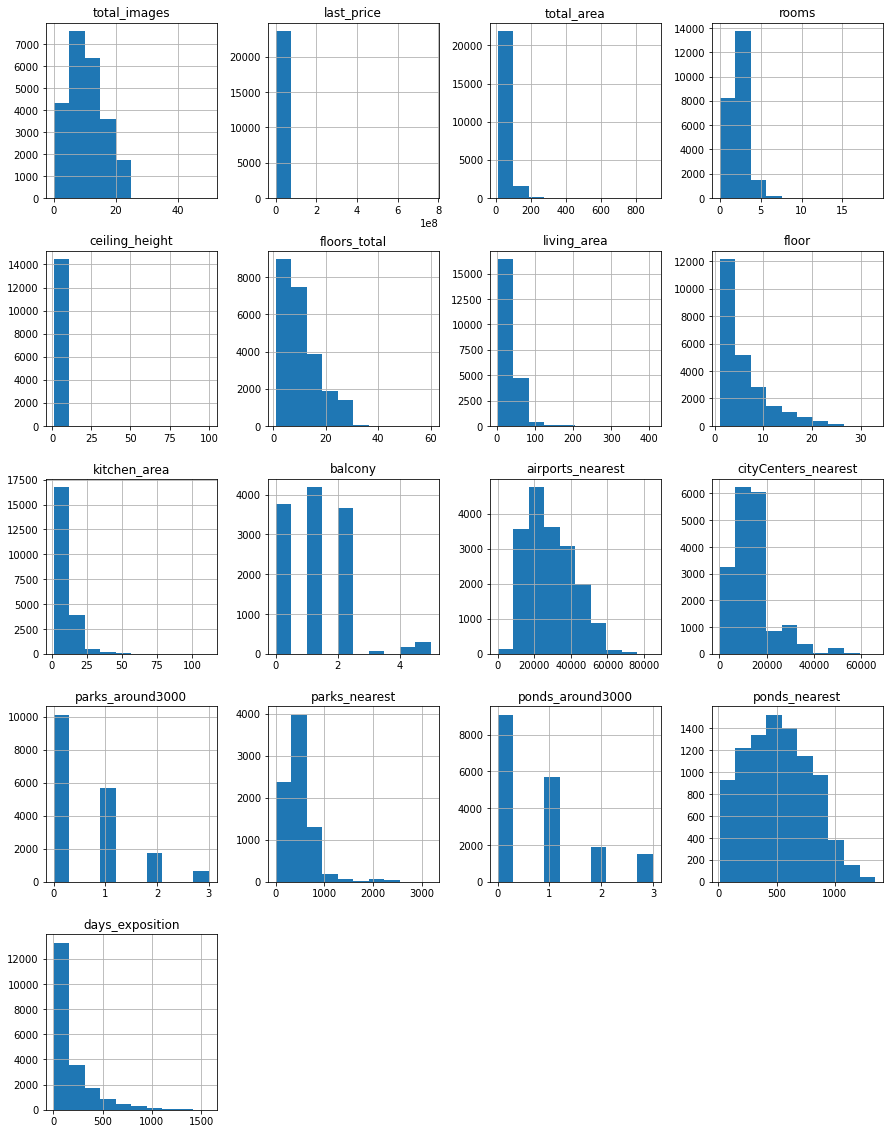

In [11]:
data.hist(figsize=(15, 20));

по гистограмам выдно что в основном данные в порядке 

вывод:
    1.исправить название столбца cityCenters_nearest
    2.исправить пропуски в столбцах ceiling_height,living_area,is_apartment,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,ponds_nearest,days_exposition
    3.максимальные значения ceiling_height 100 метров потолок решить что с ним делать
    4.минимальный kitchen_area равно 1 решить что с ним делать
    5.минимальные значение которые ровны 0. rooms решить что с ним делать
    6.минимальные значение которые ровны 0. airports_nearest решить что с ним делать
    7.изучить каждый столбец отдельно и подробно

### Предобработка данных

начинаем все столбцы по отдельности проверять

проверяем 'airports_nearest'

In [12]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [13]:
data['airports_nearest'].sort_values(ascending=True)

21085       0.0
12899    6450.0
4017     6450.0
7778     6914.0
23150    6949.0
          ...  
23683       NaN
23692       NaN
23695       NaN
23696       NaN
23698       NaN
Name: airports_nearest, Length: 23699, dtype: float64

выводим строки где 'airports_nearest'равно 0 видим что 1 строка странно но возможно оставляем как есть

In [14]:
data[data['airports_nearest']==0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,NaN,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


смортрим количество пропусков

In [15]:
data['airports_nearest'].isna().sum()

5542

меняем на меданое значение из describe

In [16]:
data['airports_nearest']=data['airports_nearest'].fillna(data['airports_nearest'].median())
data['airports_nearest'].isna().sum()


0

меняем значения на инт так как она в метрах и сантиметры не важны и нам легче будет с ним работать

In [17]:
data['airports_nearest'] =data['airports_nearest'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856,8098.0,2.0,112.0,1.0,48.0,121.0


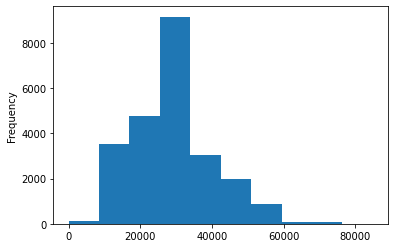

In [18]:
data['airports_nearest'].plot(bins=10,kind='hist');

Распределение Пуассона похоже что в данных нет ошибок. многго квартир продаются где то 30 км от аеропорта

проверяем столбец balcony — число балконов

In [19]:
data['balcony'].describe()


count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [20]:
data['balcony'].isna().sum()#проверка на количество пропусков

11519

In [21]:
data['balcony'].unique()#проверка на наличие уникальных значений

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [22]:
data['balcony']=data['balcony'].fillna('0')#меняем пропуски на значение 0 так как в этом случае скорее всего балконов просто нет

In [23]:
data['balcony']=data['balcony'].astype('int')#замена на инт так как количество балконов должно быть целое число
data['balcony'].head()#проверка
data['balcony'].isna().sum()#проверка

0

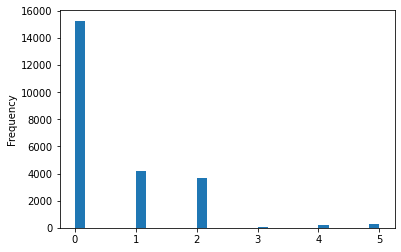

In [24]:
data['balcony'].plot(kind='hist',bins=30);

выглядит нормально. Анализ потом...

***проверяем столбец ceiling_height — высота потолков (м)***

In [25]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [26]:
data['ceiling_height'].isna().sum()#проверка на количество пропусков

9195

In [27]:
data[data['ceiling_height']== 100] #проверка максимального значение высота потолка 100м

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5,Санкт-Петербург,34963,8283.0,1.0,223.0,3.0,30.0,19.0


тут думаю правильнее удалить так как может быть что угодно
можно конечно предположить что ето в сантиметрах но тоже получится 1 м и это тоже крайность
так как внизу видем что еше есть строки по всей вераятности в дециметрах вот их поменяем на метры

In [28]:
data= data[data['ceiling_height']!= 100]


In [29]:
data['ceiling_height'].describe()#проверка

count    14503.000000
mean         2.764795
std          0.968741
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

In [30]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height']/10#меняем на метри

In [31]:
data['ceiling_height'].sort_values(ascending=False).head()#проверка

5863     8.3
17442    8.0
15743    8.0
3474     8.0
20264    6.0
Name: ceiling_height, dtype: float64

In [32]:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())#заплняем пропуски на медиану

In [33]:
data['ceiling_height'].isna().sum()#проверка

0

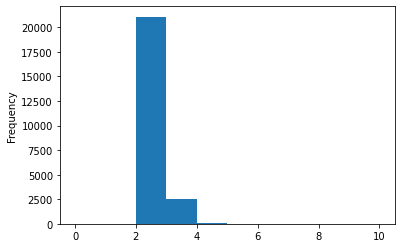

In [34]:
data['ceiling_height'].plot(kind='hist',bins=10,range=(0,10));#график

видим что больше всего от 2 до 3 метров потолки

cityCenters_nearest — расстояние до центра города (м)

In [35]:
data=data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})#1.меняем название столбца 'cityCenters_nearest'

In [36]:
data.head()#проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856,8098.0,2.0,112.0,1.0,48.0,121.0


In [37]:
data['city_centers_nearest'].describe()#проверка

count    18179.000000
mean     14191.602838
std       8608.511445
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [38]:
data['city_centers_nearest'].isna().sum()#проверка

5519

In [39]:
data['city_centers_nearest']=data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())#заплняем пропуски на медиану

In [40]:
data['city_centers_nearest'].isna().sum()#проверка

0

In [41]:
data['city_centers_nearest'].sort_values()#data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height']/10

13694      181.0
1182       208.0
8614       215.0
1934       287.0
20873      291.0
          ...   
5218     64857.0
20746    65105.0
577      65764.0
5340     65952.0
9640     65968.0
Name: city_centers_nearest, Length: 23698, dtype: float64

In [42]:
data['city_centers_nearest']= (data['city_centers_nearest']/1000).astype('int')#меняем на километры и на инт

это Задание внизу больше не буду)))

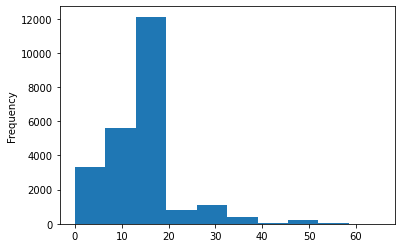

In [43]:
data['city_centers_nearest'].plot(kind='hist',bins=10);#график

болше всего до 20км есть в данных Распределение Пуассона похоже что в данных нет ошибок

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [44]:
data['days_exposition'].describe()#проверка

count    20517.000000
mean       180.896525
std        219.730436
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [45]:
data['days_exposition'].isna().sum()#проверка

3181

In [46]:
data['days_exposition']=data['days_exposition'].fillna(data['days_exposition'].median())#заплняем пропуски на медиану

In [47]:
data['days_exposition']=data['days_exposition'].astype('int') # меняем на инт что бы дни показывал нормально

In [48]:
data.head(5)# проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863,16,1.0,482.0,2.0,755.0,95
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817,18,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741,13,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098,6,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856,8,2.0,112.0,1.0,48.0,121


In [49]:
data['days_exposition'].isna().sum()#проверка

0

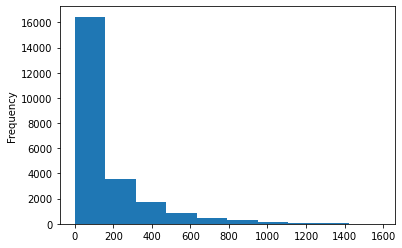

In [50]:
data['days_exposition'].plot(kind='hist',bins=10);#график

видем что в среднем дома продовались до 180 дней

first_day_exposition — дата публикации

In [51]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [52]:
data['first_day_exposition'].isna().sum()#проверка пропусков

0

нет  пропусков

убираем часы минуты секунди

In [53]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y %m %d', errors='ignore')

In [54]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

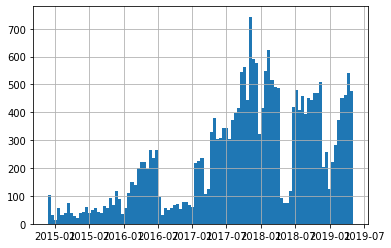

In [55]:
data['first_day_exposition'].hist(bins=100);

видем что в 2018 году хорошо продавались квартиры 

floor — этаж

In [56]:
data['floor'].sort_values().tail(10)

7711     27
13276    27
23292    27
2629     27
397      28
11079    29
1917     30
18629    31
11575    32
18218    33
Name: floor, dtype: int64

In [57]:
len(data['floor'].unique())

33

In [58]:
data['floor'].isna().sum()

0

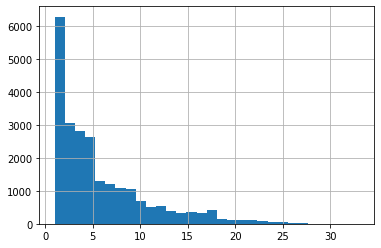

In [59]:
data['floor'].hist(bins=30);

сданными все в порядке много квартир на первых 5 этажах Распределение Пуассона похоже что в данных нет ошибок

floors_total — всего этажей в доме

In [60]:
data['floors_total'].head()#смотрим данные

0    16.0
1    11.0
2     5.0
3    14.0
4    14.0
Name: floors_total, dtype: float64

In [61]:
data['floors_total'].isna().sum() #смотрим пропуски

86

In [62]:
data[data['floors_total'].isna()==True]#пытаемся найти логику пропусков

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,2.65,NaN,30.80,4,NaN,...,12.00,0,Санкт-Петербург,39197,12,1.0,123.0,0.0,NaN,49
237,4,2438033.0,28.1,2016-11-23,1,2.65,NaN,20.75,1,NaN,...,NaN,0,Санкт-Петербург,22041,17,0.0,NaN,1.0,374.0,251
457,4,9788348.0,70.8,2015-08-01,2,2.65,NaN,38.40,12,NaN,...,10.63,0,Санкт-Петербург,37364,8,2.0,309.0,2.0,706.0,727
671,4,6051191.0,93.6,2017-04-06,3,2.65,NaN,47.10,8,NaN,...,16.80,0,Санкт-Петербург,22041,17,0.0,NaN,1.0,374.0,123
1757,5,3600000.0,39.0,2017-04-22,1,2.65,NaN,NaN,9,NaN,...,NaN,0,Санкт-Петербург,22735,11,1.0,835.0,1.0,652.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.80,NaN,NaN,3,NaN,...,NaN,0,Санкт-Петербург,51340,15,0.0,NaN,1.0,853.0,512
22656,4,4574160.0,64.5,2017-04-02,2,2.65,NaN,31.70,20,NaN,...,14.40,0,Санкт-Петербург,22041,17,0.0,NaN,1.0,374.0,127
22808,0,14569263.0,110.4,2016-11-20,3,2.65,NaN,45.38,6,NaN,...,23.42,0,Санкт-Петербург,19095,4,0.0,NaN,0.0,NaN,260
23590,0,21187872.0,123.3,2017-04-25,3,2.65,NaN,50.40,18,NaN,...,23.60,0,Санкт-Петербург,19095,4,0.0,NaN,0.0,NaN,104


видем что есть связь с апартаментами но это проверим потом сейчас просто заполним данные просто с столбца floor так как меньше не может быть

In [63]:
data['floors_total']=data['floors_total'].fillna(data['floor'])

In [64]:
data['floors_total'].describe()

count    23698.000000
mean        10.671702
std          6.595838
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [65]:
data['floors_total']=data['floors_total'].astype('int')#меняем на инт легче читать менше памяти седает

In [66]:
data['floors_total'].head()

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int64

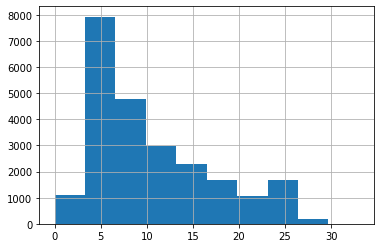

In [67]:
data['floors_total'].hist(bins=10,range=(0,33));


в пятиэтажках больше всего продают квартиры Распределение Пуассона похоже что в данных нет ошибок хотя и есть небольшой пик на 25.

is_apartment — апартаменты (булев тип)

In [68]:
data['is_apartment'].describe()

count      2774
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

In [69]:
data['is_apartment'].isna().sum()

20924

In [70]:
data['is_apartment'].unique()#наверно  пропуск означает False просто не обозначили

array([nan, False, True], dtype=object)

In [71]:
data['is_apartment']=data['is_apartment'].fillna(True)

In [72]:
data['is_apartment'].unique()# проверка

array([ True, False])

In [73]:
data['is_apartment'].isna().sum()# проверка

0

kitchen_area — площадь кухни в квадратных метрах (м²)

In [74]:
data['kitchen_area'].describe()

count    21420.000000
mean        10.569787
std          5.905575
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [75]:
data['kitchen_area'].isna().sum()

2278

тут наверно в место пропусков лучше поставить 0. может по всяким причинам не отмечена кухня например студия или тому похожое.

In [76]:
data['kitchen_area']=data['kitchen_area'].fillna(0)

In [77]:
data['kitchen_area'].isna().sum()

0

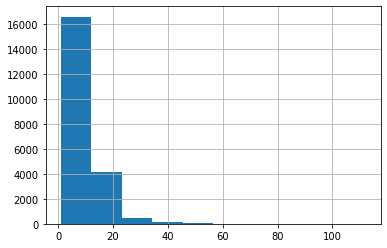

In [78]:
data['kitchen_area'].hist(bins=10,range=(1,112));

в среднем площадь кухни  10м2  75 процентов меньше 12м2  очен редко доходит до 112м2  Распределение Пуассона похоже что в данных нет ошибок

last_price — цена на момент снятия с публикации

In [79]:
data['last_price'].describe()

count    2.369800e+04
mean     6.541192e+06
std      1.088710e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799750e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [80]:
data['last_price'].head()#смотрим на данные

0    13000000.0
1     3350000.0
2     5196000.0
3    64900000.0
4    10000000.0
Name: last_price, dtype: float64

In [81]:
data['last_price'].isna().sum()#пропусков нет

0

цена в рублях меняем на int

In [82]:
data['last_price']=data['last_price'].astype('int')

In [83]:
data['last_price'].head()#смотрим на данные

0    13000000
1     3350000
2     5196000
3    64900000
4    10000000
Name: last_price, dtype: int64

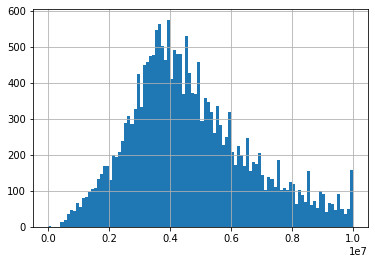

In [84]:
data['last_price'].hist(bins=100,range=(0,10000000));

Распределение Пуассона похоже что в данных нет ошибок

In [85]:
data['last_price'].describe().astype('int')

count        23698
mean       6541191
std       10887104
min          12190
25%        3400000
50%        4650000
75%        6799750
max      763000000
Name: last_price, dtype: int64

 средная цена 6540769 у 75 процентов цена ниже 6799000 но доходит до 763000000 из за того что сильный разброс в цене есть большая разница между медианой и средным Распределение Пуассона похоже что в данных нет ошибок

living_area — жилая площадь в квадратных метрах (м²)

In [86]:
data['living_area'].head()

0    51.0
1    18.6
2    34.3
3     NaN
4    32.0
Name: living_area, dtype: float64

In [87]:
data['living_area'].describe()

count    21795.000000
mean        34.458791
std         22.030515
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [88]:
data['living_area'].isna().sum()

1903

In [89]:
data[data['living_area'].isna()==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,True,...,0.0,0,Санкт-Петербург,28098,6,2.0,84.0,3.0,234.0,424
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,True,...,18.9,2,Санкт-Петербург,23982,11,0.0,NaN,0.0,NaN,95
30,12,2200000,32.80,2018-02-19,1,2.65,9,NaN,2,True,...,0.0,0,Коммунар,26726,13,NaN,NaN,NaN,NaN,63
37,10,1990000,45.80,2017-10-28,2,2.50,5,NaN,1,True,...,0.0,0,поселок городского типа Красный Бор,26726,13,NaN,NaN,NaN,NaN,196
44,13,5350000,40.00,2018-11-18,1,2.65,22,NaN,3,True,...,0.0,1,Санкт-Петербург,30471,11,1.0,620.0,1.0,1152.0,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000,80.30,2018-07-03,3,2.70,12,NaN,5,True,...,0.0,0,Колпино,27933,33,0.0,NaN,2.0,562.0,60
23663,12,6400000,88.00,2018-01-12,4,2.55,10,NaN,1,True,...,0.0,0,Санкт-Петербург,33642,13,0.0,NaN,2.0,844.0,59
23670,9,2450000,45.60,2018-02-08,1,2.80,9,NaN,2,True,...,0.0,0,поселок городского типа Синявино,26726,13,NaN,NaN,NaN,NaN,45
23679,0,2500000,35.00,2017-12-08,1,2.65,9,NaN,4,True,...,0.0,0,Сосновый Бор,26726,13,NaN,NaN,NaN,NaN,45


можно было бы удалить данные но у нас в столбце total_area нет пропусков так что мы можем хотя бы прмерно рассчитать 'living_area'  из total_area снимая kitchen_area возможно еше и балкон нужно снять но это не точно так как мы не знаем балконы входят в обшую или нет.

In [90]:
data['total_area'].isna().sum()

0

In [91]:
data['total_area'].describe()

count    23698.000000
mean        60.350143
std         35.654096
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

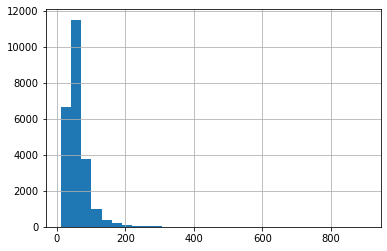

In [92]:
data['total_area'].hist(bins=30);#за одно и проверили total_area

In [93]:
data['living_area']=data['living_area'].fillna(data['total_area']-data['kitchen_area'])

In [94]:
data['living_area'].isna().sum()

0

In [95]:
data['living_area'].describe()

count    23698.000000
mean        36.533822
std         25.483815
min          2.000000
25%         19.000000
50%         31.000000
75%         44.000000
max        571.000000
Name: living_area, dtype: float64

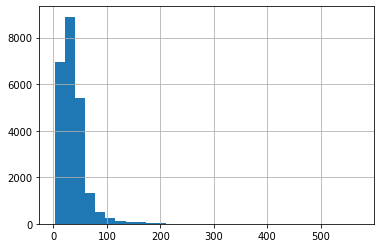

In [96]:
data['living_area'].hist(bins=30);

в среднем жилая площадь квартири 36.5м2  75 процентов меньше 44м2  очен редко доходит до 571м2  Распределение Пуассона похоже что в данных нет ошибок

locality_name — название населённого пункта

In [97]:
data['locality_name'].describe()

count               23649
unique                364
top       Санкт-Петербург
freq                15720
Name: locality_name, dtype: object

In [98]:
data['locality_name'].isna().sum()#смотрим пропуски

49

In [99]:
data['locality_name'].unique()#видим что е и ё в в слове пасёлок часто путаются не исключено что в словах тоже хотя я не заметил
#поменяем все ё на е чтобы все сразу исправить

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [100]:
len(data['locality_name'].unique())#смотрим количество уникальных значение

365

In [101]:
data['locality_name'] = data['locality_name'].str.lower()#приводим к нижнему регистру

In [102]:
data['locality_name'].duplicated().sum()#сумма дупликатов

23333

In [103]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')#меняем значения

In [104]:
data['locality_name'].duplicated().sum()#проверяем

23367

In [105]:
len(data['locality_name'].unique())#проверяем

331

In [106]:
data['locality_name'].unique()#проверяем

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [107]:
data[data['locality_name'].isna()==True]#смотрим пропуски

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000,81.70,2016-04-15,3,3.55,5,50.80,2,True,...,8.80,0,NaN,23478,4,0.0,NaN,0.0,NaN,147
2033,6,5398000,80.00,2017-05-30,3,2.65,4,42.60,2,True,...,18.60,0,NaN,26726,13,NaN,NaN,NaN,NaN,34
2603,20,3351765,42.70,2015-09-20,1,2.65,24,15.60,3,True,...,10.70,0,NaN,22041,17,0.0,NaN,1.0,374.0,276
2632,2,5130593,62.40,2015-10-11,2,2.65,24,33.10,21,True,...,8.20,0,NaN,22041,17,0.0,NaN,1.0,374.0,256
3574,10,4200000,46.50,2016-05-28,2,2.65,5,30.80,5,True,...,6.50,0,NaN,27419,8,0.0,NaN,1.0,603.0,45
4151,17,17600000,89.50,2014-12-09,2,3.00,8,39.62,7,True,...,13.38,0,NaN,25054,3,1.0,485.0,3.0,722.0,869
4189,7,9200000,80.00,2015-12-10,3,4.00,4,52.30,3,False,...,10.40,0,NaN,21774,3,1.0,690.0,1.0,953.0,223
4670,1,5500000,83.00,2015-08-14,3,2.65,7,83.00,6,True,...,0.00,0,NaN,26534,5,1.0,446.0,1.0,376.0,350
5343,19,13540000,85.50,2016-01-20,3,2.65,7,59.10,5,False,...,8.30,4,NaN,10556,9,1.0,67.0,0.0,NaN,303
5707,7,3700000,30.00,2016-04-29,1,2.65,24,20.00,23,True,...,0.00,0,NaN,21460,16,0.0,NaN,1.0,170.0,49


In [108]:
data=data[data['locality_name'].isna()!=True]

In [109]:
data.info()#проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23649 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23649 non-null  int64         
 1   last_price            23649 non-null  int64         
 2   total_area            23649 non-null  float64       
 3   first_day_exposition  23649 non-null  datetime64[ns]
 4   rooms                 23649 non-null  int64         
 5   ceiling_height        23649 non-null  float64       
 6   floors_total          23649 non-null  int64         
 7   living_area           23649 non-null  float64       
 8   floor                 23649 non-null  int64         
 9   is_apartment          23649 non-null  bool          
 10  studio                23649 non-null  bool          
 11  open_plan             23649 non-null  bool          
 12  kitchen_area          23649 non-null  float64       
 13  balcony         

open_plan — свободная планировка (булев тип)

In [110]:
data['open_plan'].describe()

count     23649
unique        2
top       False
freq      23582
Name: open_plan, dtype: object

In [111]:
data['open_plan'].isna().sum()

0

In [112]:
data['open_plan'].unique()

array([False,  True])

тут все в порядке

parks_around3000 — число парков в радиусе 3 км

In [113]:
data['parks_around3000'].describe()

count    18139.000000
mean         0.611555
std          0.802020
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [114]:
data['parks_around3000'].isna().sum()#пропуски надо заменить на 0 наверно  не отмечено что нет рядом парков

5510

In [115]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [116]:
data['parks_around3000']=data['parks_around3000'].fillna(0)

In [117]:
data['parks_around3000'].isna().sum()

0

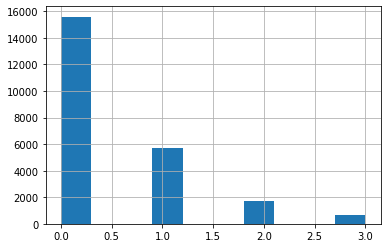

In [118]:
data['parks_around3000'].hist(bins=10);

parks_nearest — расстояние до ближайшего парка (м)

In [119]:
data['parks_nearest'].head()

0    482.0
1      NaN
2     90.0
3     84.0
4    112.0
Name: parks_nearest, dtype: float64

In [120]:
data['parks_nearest'].isna().sum()

15586

In [121]:
data[data['parks_nearest'].isna()==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,11.00,2,поселок шушары,12817,18,0.0,NaN,0.0,NaN,81
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,9.10,0,городской поселок янино-1,26726,13,0.0,NaN,NaN,NaN,55
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,14.40,1,поселок парголово,52996,19,0.0,NaN,0.0,NaN,155
7,5,7915000,71.60,2019-04-18,2,2.65,24,52.70,22,True,...,18.90,2,санкт-петербург,23982,11,0.0,NaN,0.0,NaN,95
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,8.81,0,поселок мурино,26726,13,0.0,NaN,NaN,NaN,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,True,...,10.60,1,санкт-петербург,19424,4,0.0,NaN,1.0,806.0,519
23692,2,1350000,30.00,2017-07-07,1,2.65,5,17.50,4,True,...,6.00,0,тихвин,26726,13,0.0,NaN,NaN,NaN,413
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,True,...,8.50,0,тосно,26726,13,0.0,NaN,NaN,NaN,45
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,True,...,0.00,0,село рождествено,26726,13,0.0,NaN,NaN,NaN,95


In [122]:
data.pivot_table(index='parks_around3000',values='parks_nearest',aggfunc=['count'])

,count
,parks_nearest
parks_around3000,
0.0,4
1.0,5670
2.0,1744
3.0,645


видем что у кого рядом нет парков только 4 человека вбили сколькл метров до парка
логично что пропуски это те у кого парки далеко больше 3000м так как эти данные не будем дальше использовать 
просто забем 4000 что бы не потерять данные

In [123]:
data['parks_nearest']=data['parks_nearest'].fillna(4000)

In [124]:
data['parks_nearest'].isna().sum()

0

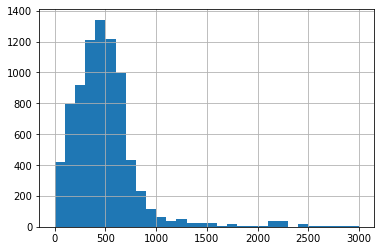

In [125]:
data['parks_nearest'].hist(bins=30,range=(0,3000));

<AxesSubplot:>

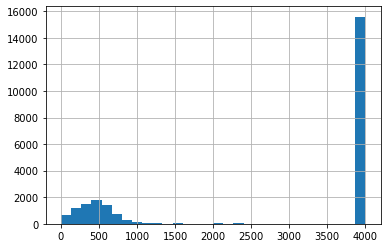

In [126]:
data['parks_nearest'].hist(bins=30)

Распределение Пуассона похоже что в данных нет ошибок не считая что есть пик 4000 которую мы добаили которые находятся далеко от парка но мы точно не знаем насколько возможно и 8 10 и 100 км.возможно столо бы обратится к колегам которые смогут добить эти данные так как их много и удалять не желательно

ponds_around3000 — число водоёмов в радиусе 3 км

In [127]:
data['ponds_around3000'].describe()

count    18139.000000
mean         0.769557
std          0.937828
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [128]:
data['ponds_around3000'].head()

0    2.0
1    0.0
2    2.0
3    3.0
4    1.0
Name: ponds_around3000, dtype: float64

In [129]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [130]:
data['ponds_around3000'].isna().sum()#пропуски логично что означает нет водоемов

5510

In [131]:
data['ponds_around3000']=data['ponds_around3000'].fillna(0)

In [132]:
data['ponds_around3000'].isna().sum()

0

In [133]:
data['ponds_around3000']=data['ponds_around3000'].astype('int')#поменяем на int меньше памяти и удобно

In [134]:
data['ponds_around3000'].head()

0    2
1    0
2    2
3    3
4    1
Name: ponds_around3000, dtype: int64

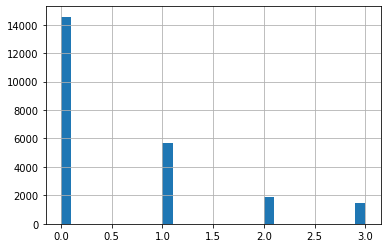

In [135]:
data['ponds_around3000'].hist(bins=30);

ponds_nearest — расстояние до ближайшего водоёма (м)

In [136]:
data['ponds_nearest'].describe()

count    9084.000000
mean      518.113606
std       277.809826
min        13.000000
25%       293.750000
50%       502.500000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [137]:
data['ponds_nearest'].head()

0    755.0
1      NaN
2    574.0
3    234.0
4     48.0
Name: ponds_nearest, dtype: float64

In [138]:
data['ponds_nearest'].isna().sum()

14565

In [139]:
data.groupby('ponds_around3000')['ponds_nearest'].count()

ponds_around3000
0       0
1    5702
2    1889
3    1493
Name: ponds_nearest, dtype: int64

неодин человек не указал сколько растояние до водвёма из тех от кого далеко водоембольше 3 км 
значит пропуски очень возможно они и есть
заполним как 4000 что бы не потерять данные

In [140]:
data['ponds_nearest']=data['ponds_nearest'].fillna(4000)

In [141]:
data['ponds_nearest'].isna().sum()

0

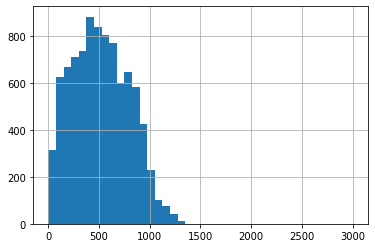

In [142]:
data['ponds_nearest'].hist(bins=40,range=(0,3000));

Распределение Пуассона похоже что в данных нет ошибок

rooms — число комнат

In [143]:
data['rooms'].describe()

count    23649.000000
mean         2.070151
std          1.078621
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [144]:
data['rooms'].head()

0    3
1    1
2    2
3    3
4    2
Name: rooms, dtype: int64

In [145]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

видим что пропусков нет но дальше еше раз проверим. 0 комнат надо проверить сомнительно как то

In [146]:
data['rooms'].isna().sum()

0

In [147]:
data.pivot_table(index='rooms',values=['studio','total_area','living_area','kitchen_area'],aggfunc=['count'])

count                              
      kitchen_area living_area studio total_area
rooms                                           
0              197         197    197        197
1             8035        8035   8035       8035
2             7924        7924   7924       7924
3             5797        5797   5797       5797
4             1175        1175   1175       1175
5              326         326    326        326
6              105         105    105        105
7               59          59     59         59
8               12          12     12         12
9                8           8      8          8
10               3           3      3          3
11               2           2      2          2
12               1           1      1          1
14               2           2      2          2
15               1           1      1          1
16               1           1      1          1
19               1           1      1          1

это студия все в порядке

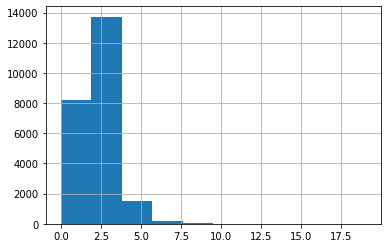

In [148]:
data['rooms'].hist(bins=10,range=(0,19));

Распределение Пуассона похоже что в данных нет ошибок

In [149]:
data['rooms'].describe().astype('int')

count    23649
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: int64

75% меньше 3 комнат в среднем 2 комнаты есть уникальные образцы 19 комнат

studio — квартира-студия (булев тип)

In [150]:
data['studio'].describe()

count     23649
unique        2
top       False
freq      23500
Name: studio, dtype: object

In [151]:
data['studio'].isna().sum()

0

все в порядке

total_area — общая площадь квартиры в квадратных метрах (м²)

In [152]:
data['total_area'].describe()

count    23649.000000
mean        60.330563
std         35.661822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

проверим что там за 900 м2 и пропуски

In [153]:
data['total_area'].isna().sum()

0

In [154]:
data[data['total_area']==900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,True,...,112.0,0,санкт-петербург,30706,7,0.0,4000.0,2,318.0,106


все нормально

In [155]:
data[data['total_area']==12]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000,12.0,2017-07-19,1,2.55,5,10.0,2,True,...,0.0,0,санкт-петербург,21314,0,1.0,886.0,2,45.0,200


все нормально только на инт поменяем что бы и памяти меньше занимала и удобнее было читать

In [156]:
data['total_area']=data['total_area'].astype('int')

In [157]:
data['total_area'].head()

0    108
1     40
2     56
3    159
4    100
Name: total_area, dtype: int64

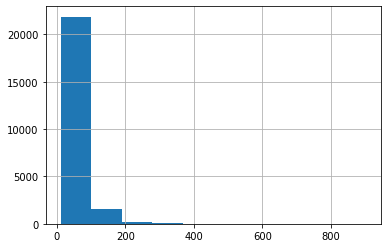

In [158]:
data['total_area'].hist(bins=10);

в среднем площадь квартири 60.3м2  75 процентов меньше 69.7м2  очен редко доходит до 900м2  Распределение Пуассона похоже что в данных нет ошибок

total_images — число фотографий квартиры в объявлении

In [159]:
data['total_images'].describe()

count    23649.000000
mean         9.862743
std          5.682037
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

In [160]:
data['total_images'].head()

0    20
1     7
2    10
3     0
4     2
Name: total_images, dtype: int64

In [161]:
data['total_images'].isna().sum()

0

In [162]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

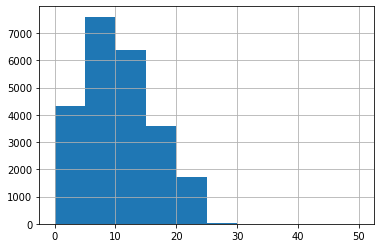

In [163]:
data['total_images'].hist();

Распределение Пуассона похоже что в данных нет ошибок

In [164]:
data['parks_around3000'].isna().sum()

0

In [165]:
data['parks_around3000']=data['parks_around3000'].astype('int')

In [166]:
data['parks_around3000']

0        1
1        0
2        1
3        2
4        2
        ..
23694    1
23695    0
23696    0
23697    2
23698    0
Name: parks_around3000, Length: 23649, dtype: int64


в этом разделе мы поменяли  название столбца cityCenters_nearest на city_сenters_nearest заменили пропуски на валидные значение в столбцах  
ceiling_height,living_area,is_apartment,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,ponds_nearest,days_exposition
а то что не нашл удалили в общем удалили только одну строку
изменил тип данны в стобцах airports_nearest,parks_around3000,balcony,floors_total,city_centers_nearest(заменили на км)first_day_exposition(убрал часы минуты секунды)
в locality_name  исправили опечатки построили гистограми  проверил на дупликаты

### Посчитайте и добавьте в таблицу новые столбцы

новый столбец цена квадратного метра округляем до рубля (int)

 посчитано и добавлено в таблицу: цена одного квадратного метра

In [167]:
data['price_meter']=(data['last_price']/data['total_area']).astype('int')

In [168]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,True,...,0,санкт-петербург,18863,16,1,482.0,2,755.0,95,120370
1,7,3350000,40,2018-12-04,1,2.65,11,18.6,1,True,...,2,поселок шушары,12817,18,0,4000.0,0,4000.0,81,83750
2,10,5196000,56,2015-08-20,2,2.65,5,34.3,4,True,...,0,санкт-петербург,21741,13,1,90.0,2,574.0,558,92785
3,0,64900000,159,2015-07-24,3,2.65,14,159.0,9,True,...,0,санкт-петербург,28098,6,2,84.0,3,234.0,424,408176
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,True,...,0,санкт-петербург,31856,8,2,112.0,1,48.0,121,100000


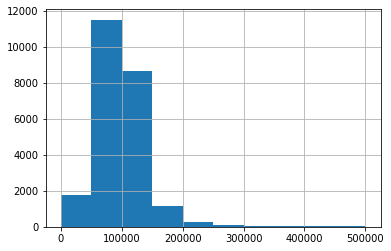

In [169]:
data['price_meter'].hist(bins=10,range=(0,500000));

In [170]:
data['price_meter'].mean()

99863.38623197598

в среднем квадратный метр стоит 100000 такых квартир очень много остальнные разы меньше Распределение Пуассона похоже что в данных нет ошибок

посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [171]:
data['week']= data['first_day_exposition'].dt.weekday

 посчитано и добавлено в таблицу: месяц публикации объявления

In [172]:
data['month']=data['first_day_exposition'].dt.month

 посчитано и добавлено в таблицу: год публикации объявления

In [173]:
data['year']=data['first_day_exposition'].dt.year

In [174]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,week,month,year
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,True,...,16,1,482.0,2,755.0,95,120370,3,3,2019
1,7,3350000,40,2018-12-04,1,2.65,11,18.6,1,True,...,18,0,4000.0,0,4000.0,81,83750,1,12,2018
2,10,5196000,56,2015-08-20,2,2.65,5,34.3,4,True,...,13,1,90.0,2,574.0,558,92785,3,8,2015
3,0,64900000,159,2015-07-24,3,2.65,14,159.0,9,True,...,6,2,84.0,3,234.0,424,408176,4,7,2015
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,True,...,8,2,112.0,1,48.0,121,100000,1,6,2018


 посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)

добавим столбец floor_group и дадим значение другой потом те которые на последнем этаже поменяем на последный а которие на первом поменяем на первый

In [175]:
data['floor_group']='другой'

In [176]:
data.loc[data['floor'] == 1, 'floor_group'] = 'первый'

In [177]:
data.loc[data['floor'] == data['floors_total'], 'floor_group'] = 'последний'

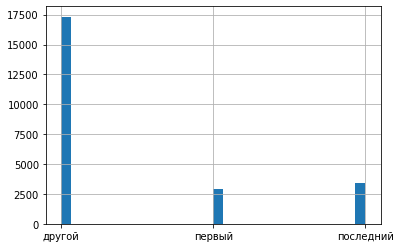

In [178]:
data['floor_group'].hist(bins=30);

In [179]:
len(data[data['floor_group']== 'последний'])


3439

In [180]:
len(data[data['floor_group']== 'первый'])


2884

In [181]:
len(data[data['floor_group']== 'другой'])

17326

видем что на последном этаже чуть больше квартир чем на первом этаже
но сравнительно с квартирами на другых этажах они одинаковы 
и разница незначитильна

посчитано и добавлено в таблицу: расстояние в км до центра города

In [182]:
data['city_centers_nearest'].head()# сделанно выше

0    16
1    18
2    13
3     6
4     8
Name: city_centers_nearest, dtype: int64

### Проведите исследовательский анализ данных

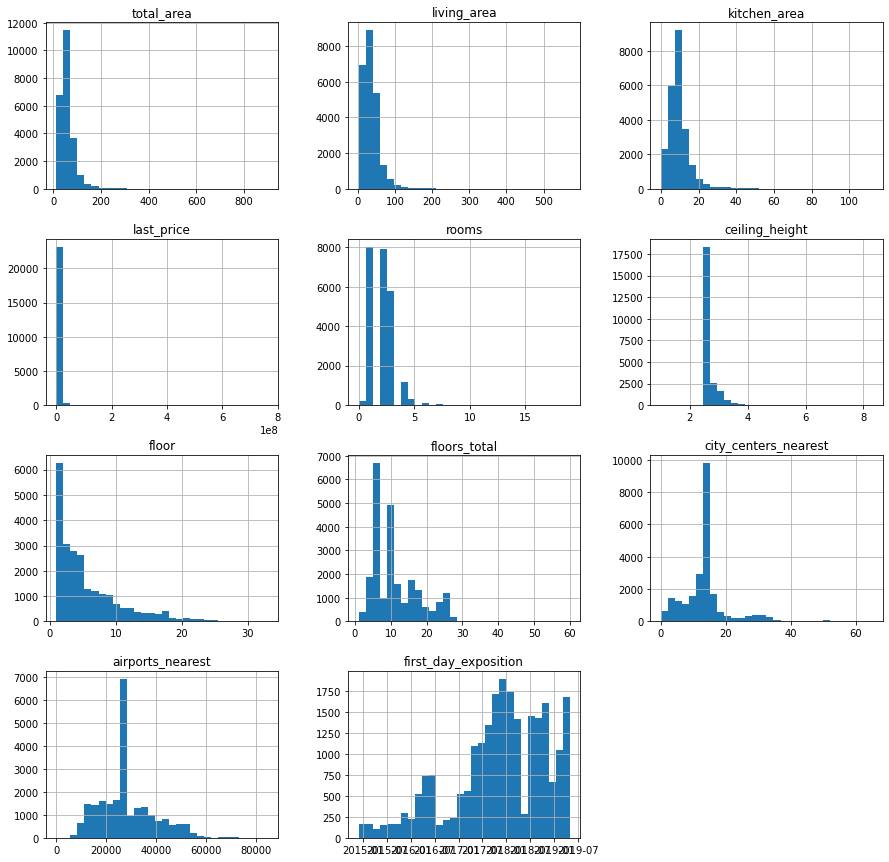

In [183]:
data.hist(column=['total_area','living_area','kitchen_area','last_price','rooms','ceiling_height','floor','floor_group','floors_total','city_centers_nearest','airports_nearest','first_day_exposition'],figsize=(15,15),bins=30)
plt.show()

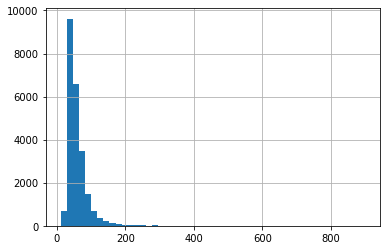

In [184]:
data['total_area'].hist(bins=50);

In [185]:
data['total_area'].describe()

count    23649.000000
mean        60.102414
std         35.673543
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

75% квартир меньше 69м2 в среднем 60м2.медиана 52м2 сильно отличается от средного это не странно потому что видим 
разброс от 12 до 900м2

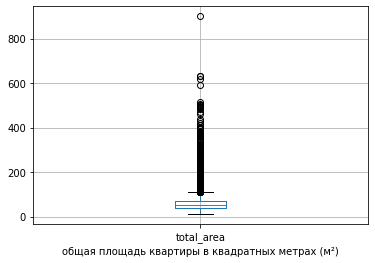

In [186]:
data.boxplot('total_area')
plt.xlabel('общая площадь квартиры в квадратных метрах (м²)')
plt.show()

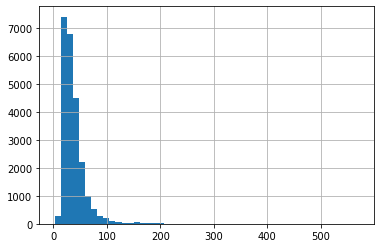

In [187]:
data['living_area'].hist(bins=50);

In [188]:
data['living_area'].describe()

count    23649.000000
mean        36.519814
std         25.486772
min          2.000000
25%         19.000000
50%         31.000000
75%         44.000000
max        571.000000
Name: living_area, dtype: float64

бросается в глаза 2 м2 возможно стоило бы удалть это значение.в среднем 36м2 ьедиана 31 м2 здес по сровнению с обшей площадю уже разница не большая максимальное значение уже 571 м2 от 900м2 обшей площадьи 

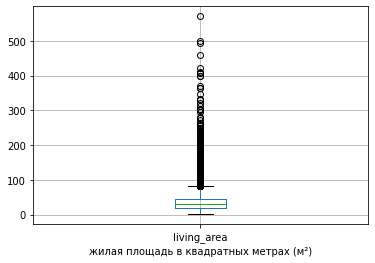

In [189]:
data.boxplot('living_area')
plt.xlabel('жилая площадь в квадратных метрах (м²)')
plt.show()

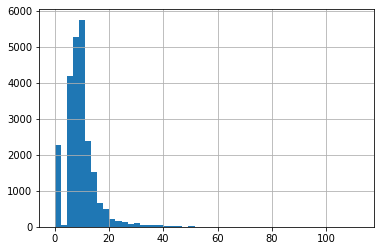

In [190]:
data['kitchen_area'].hist(bins=50);

In [191]:
data['kitchen_area'].describe()

count    23649.000000
mean         9.552592
std          6.416768
min          0.000000
25%          6.300000
50%          9.000000
75%         11.430000
max        112.000000
Name: kitchen_area, dtype: float64

тут тоже видем максимальное значение 112м2 но уже средое и меданное значение почти одинаковые 9м2 в среднем кухнии хотя и есть 0м2 но это скорее всего студия

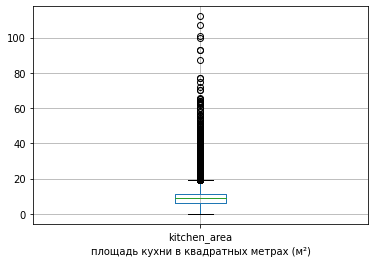

In [192]:
data.boxplot('kitchen_area')
plt.xlabel('площадь кухни в квадратных метрах (м²)')
plt.show()

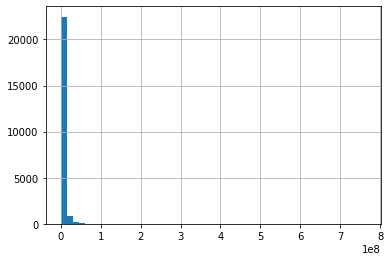

In [193]:
data['last_price'].hist(bins=50);

In [194]:
data['last_price'].describe().astype('int')

count        23649
mean       6540769
std       10896490
min          12190
25%        3400000
50%        4650000
75%        6799000
max      763000000
Name: last_price, dtype: int64

ну тут зависть меня ослепило хочу дом за 763 млн что бы за счет цены все показатели сбить))) и еше есть квартира за 12190 совсем мало не странно что среднее и медиана так сильно различаются почти на 20000

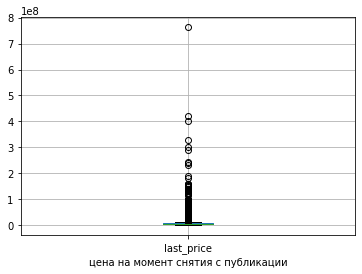

In [195]:
data.boxplot('last_price')
plt.xlabel('цена на момент снятия с публикации')
plt.show()

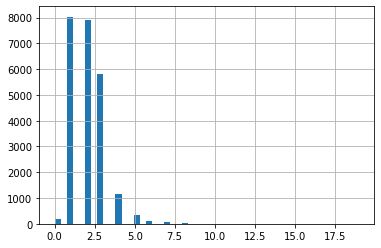

In [196]:
data['rooms'].hist(bins=50);

In [ ]:
data['rooms'].describe().astype('int')

в квартирах в среднем 2 комнаты 2-3 комнатные часто продаются 

In [ ]:
data.boxplot('rooms')
plt.xlabel('число комнат')
plt.show()

In [ ]:
data['ceiling_height'].hist(bins=50);

In [ ]:
data['ceiling_height'].describe()

высота потолка в среднем 2.7м есть есть еше 1 метр потолок но это наверно тех помешение какое то а 8.3
похоже на пентхаус или частный дом мы конечно можем посмотреть но в задане этого нет а нам лень)))

In [ ]:
data[data['ceiling_height']==8.3]#явно ошибка какя то не первый не последный этаж и 8.3 метра паталок в 16 этажном доме с 1 комната

In [ ]:
data.boxplot('ceiling_height')
plt.xlabel('высота потолков (м)')
plt.show()

In [ ]:
data['floor'].hist(bins=50);

In [ ]:
data['floor'].describe().astype('int')

часто продаются в среднем 4-5 этаж воснавном до 8ого этажа вышо уже редкость 
возможно это из за того что сравнительно реже дома выше 8 этажа.до 5 ого этажа много квартир а после уже заметно становится меньше

In [ ]:
data.boxplot('floor')
plt.xlabel('этаж')
plt.show()

In [ ]:
data['floor_group'].hist(bins=50);

In [ ]:
data['floor_group'].describe()

In [ ]:
len(data[data['floor']==1])

In [ ]:
len(data[data['floor']==5])

в категориях ервый и последный примерно  одинаковое количество в другых 
намного больше просто потому что значений там тоже больше так что по этажам судить правильнее будет до 5 ого этажа много квартир а после уже заметно становится меньше

In [ ]:
data['floors_total'].hist(bins=50);

In [ ]:
data['floors_total'].describe()

дома всреднем 10 этожей. 75% ниже 16 этажей. хотя есть и в 60 этажые домано очень мало

In [ ]:
data.boxplot('floors_total')
plt.xlabel('всего этажей в доме')
plt.show()

In [ ]:
data['city_centers_nearest'].hist(bins=50);

In [ ]:
data['city_centers_nearest'].describe()

13 км от центра много квартир 75% меньше 15 км а 25% меньше 10км

In [ ]:
data.boxplot('city_centers_nearest')
plt.xlabel(' расстояние до центра города (м)')
plt.show()

In [ ]:
data['airports_nearest'].hist(bins=50);

In [ ]:
data['airports_nearest'].describe()

среднее расстояние от аеропорта 28км  75% меньше 35км а 25% меньше 21км

In [ ]:
data.boxplot('airports_nearest')
plt.xlabel(' расстояние до ближайшего аэропорта в метрах (м)')
plt.show()

In [ ]:
data['first_day_exposition'].hist(bins=50);

видим пики 2018 и минимум 2014 остальное посмотрим после оброботки данных

  "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

In [ ]:
data['days_exposition'].describe().astype('int')

In [ ]:
data.corr()#находим коррелацию

In [ ]:
data['days_exposition'].corr(data['year'])#находим коррелацию

In [ ]:
data.pivot_table(index='year',values='days_exposition',aggfunc=['count','mean','median'])

In [ ]:
data['year'].count().mean()

In [ ]:
data.boxplot('days_exposition')
plt.ylabel('Время продажи квартиры')
plt.show()

In [ ]:
data['days_exposition'].hist(bins=50);

In [ ]:
data['days_exposition'].describe()

In [ ]:
data.pivot_table(index='year',values='days_exposition',aggfunc=['count','mean','median']).plot(kind='bar',title='days_exposition');

вывод:
в основном до 198 дней квартиры продаются редкие квартири продяются дольше. 50% квартир продаются за 95 дней 
а 25% за 45 дней.в среднем 169 дней квартира продается. видим что 2017-2018 годах был пик продаж 8185 и 8511 а в 2014 продали очень мало квартир 136. в год в среднем продается 23649 квартир. есть несилная обратная корелация -0.57 с годом продаж


 "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);

In [ ]:
data['last_price'].describe().astype('int')

In [ ]:
data['last_price'].corr(data['total_area'])


In [ ]:
data['last_price'].corr(data['living_area'])

In [ ]:
data['last_price'].corr(data['kitchen_area'])

In [ ]:
data['last_price'].corr(data['rooms'])

In [ ]:
data.pivot_table(index='floor_group',values=['total_area','living_area','kitchen_area','rooms','last_price','week','month','year'],aggfunc='corr')

вывод:
  общая площадь квартиры и жилая площадь в квадратных метрах больше всего влияют на цену в меньшей степени площадь кухни
 и число комнат остальное незначительно влияет на цену точнее не влияет. и если квартира не на первом и последнем этаже это влияние больше совсем чуть чуть возможно погрешность.
средная цена квартири 6540769 потому что есть очен дорогие квартири до 763000000 но 75% квартир стоят ниже 6799000 медиана равно 4650000  но даже 12190 руб можно купить квартиру

In [ ]:
data.plot(x='total_area', y='last_price', kind='scatter');

In [ ]:
data.plot(x='living_area', y='last_price', kind='scatter');

In [ ]:
data.plot(x='kitchen_area', y='last_price', kind='scatter');

In [ ]:
data.plot(x='rooms', y='last_price', kind='scatter');

In [ ]:
data.hist(column=['total_area','living_area','kitchen_area','rooms','last_price',  'week','month','year'],figsize=(15,15),bins=30)
plt.show()


In [ ]:
data.groupby('year')['last_price'].mean().plot.bar()

In [ ]:
data.groupby('year')['last_price'].mean().astype('int')

In [ ]:
data['last_price'].corr(data['year'])

замечаем что с 2014 года средная цена 12046600руб и идет на спад до 2018 года 5951153руб  почти в 2 раза дешевле а в 2019 году 
цена стало уже на почти на 10000 дороже 6782388руб

In [ ]:
data.groupby('month')['last_price'].mean().plot.bar()

In [ ]:
data['last_price'].corr(data['month'])

In [ ]:
data.groupby('month')['last_price'].mean().astype('int').sort_values(ascending=False)

видим что разница минимальна в декабре 7005342 чуть дороже но это наверно от того  что все хотят важные дела не оставлять на следуюший год но вся разница минимальна в октябре самая низкая цена 6235165  

In [ ]:
data.groupby('week')['last_price'].mean().plot.bar();

In [ ]:
data['last_price'].corr(data['week'])

In [ ]:
data.groupby('week')['last_price'].mean().astype('int').sort_values(ascending=False)

в суботу минимальная средная цена  6249359 а в пятницу6982510 и в среду6711766 максимальная средная цена 

In [ ]:
data.groupby('floor_group')['last_price'].mean().plot.bar();

In [ ]:
data.groupby('floor_group')['last_price'].mean().astype('int')

видим реальную разницу в цене первого этажа 4820065 они дешовые. похоже народ не любит первые этажи дорже всех последные этажи 
но другие этажи тоже от последного не сильно дешевле.похоже реально просто люди не хотят жить на первых этажах

In [ ]:
data.pivot_table(index='floor_group',values=['last_price','week','month','year'],aggfunc='corr')

корреляции Пирсона не находит ничего сушественного связи нет 

In [ ]:
data.hist(column=['week','month','year'],figsize=(15,15),bins=30)
plt.show()

видем что почему то на 6-7 день недельи мало кто подает обявление остальные дни примерно одинаковы исория повторяется с месяцами в январе и в мае мало квартир но в феврале пик наверно это связано с новым годом.так же наблюдаем в 2014 году спад интереса к квартирам а вот 2017-2918 годах уже максимум и 2019 опять спад

 выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."

In [ ]:
data.pivot_table(index='locality_name',values='price_meter',aggfunc=['count','mean'])

In [ ]:
dt = data.pivot_table(index='locality_name', values=['rooms'], aggfunc='count').sort_values(by='rooms', ascending=False)
dt.columns=['counts']
dt

In [ ]:
dt['means']=(data.pivot_table(index='locality_name', values='price_meter', aggfunc='mean')).astype('int')

In [ ]:
dt

In [ ]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

In [ ]:
dt[dt['means']==dt['means'].max()]

In [ ]:
dt[dt['means']==dt['means'].min()]

 выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [ ]:
data.head()

In [ ]:
data['city_centers_nearest'].corr(data['price_meter'])#находим коррелацию

In [ ]:
data['city_centers_nearest'].corr(data['last_price'])

по всему датасету есть обратная кореллация чем дальше тем дешевле становится дом 

In [ ]:
st=data[data['locality_name']=='санкт-петербург']

In [ ]:
st['city_centers_nearest'].corr(st['price_meter'])#находим коррелацию

In [ ]:
st['city_centers_nearest'].corr(st['last_price'])

в Питере еше больше обратная кореллайия возможно из за того что в больших городах быть ближе к центру особенно важно а почему тут Москвы нет?

In [ ]:
st['city_centers_nearest'].unique()

In [ ]:
st.groupby('city_centers_nearest')['price_meter'].mean().astype('int')#посмотрим на средние цены за м2 по каждому километу наверно даже смотреть бесмисленно

как помотрели делаем умное лицо и считаем на сколько поднимается цена в среднем за м2.

In [ ]:
((st.groupby('city_centers_nearest')['price_meter'].mean().max().astype('int')-st.groupby('city_centers_nearest')['price_meter'].mean().min().astype('int'))/29).astype('int')

за каждый км цена за квадратный метр дорожает на 4300 рублей.

In [ ]:
st.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='mean').plot(figsize=(10,5), grid=True, linewidth=3, title='График удалённости от центра')


In [ ]:
len(data[data['floor']==3])

In [ ]:
len(data[data['floor']==2])

In [ ]:
len(data[data['floor']==1])

In [ ]:
len(data[data['floor']==4])

In [ ]:
data['floor'].hist(bins=5)

### Общий вывод

в рамках нашего анализа мы выяснили что:
общая площадь квартиры и жилая площадь в квадратных метрах больше всего влияют на цену
в меньшей степени площадь кухни и число комнат остальное не влияет практически.

средняя цена квартир 6540769 руб. Есть очень дорогие квартиры до 763000000, но 75% квартир стоят
ниже 6799000 медиана равно 4650000, но даже 12190 руб. можно купить квартиру

в основном до 198 дней квартиры продаются. Редкие квартиры продаются дольше.
50% квартир продаются за 95 дней, а 25% за 45 дней. В среднем 169 дней квартира продается.
Видим что 2017-2018 годах был пик продаж 8185 и 8511 квартир, а в 2014 продали очень мало квартир 136.
в год в среднем продается 23649 квартир. Есть несильная обратная корреляция -0.57 с годом продаж
на последнем этаже чуть больше квартир чем на первом этаже, но сравнительно
с квартирами на других этажах они одинаковы и разница незначительна
в среднем площадь квартиры 60.3м2 75 процентов меньше 69.7м2 очен редко доходит до 900м2
в среднем жилая площадь квартиры 36.5м2 75 процентов меньше 44м2 очень редко доходит до 571м2
за каждый км цена за квадратный метр дорожает на 4300 рублей.
В Питере ещё больше обратная коррелация возможно из-за того что в больших городах быть ближе к центру особенно важно, а почему тут Москвы нет?